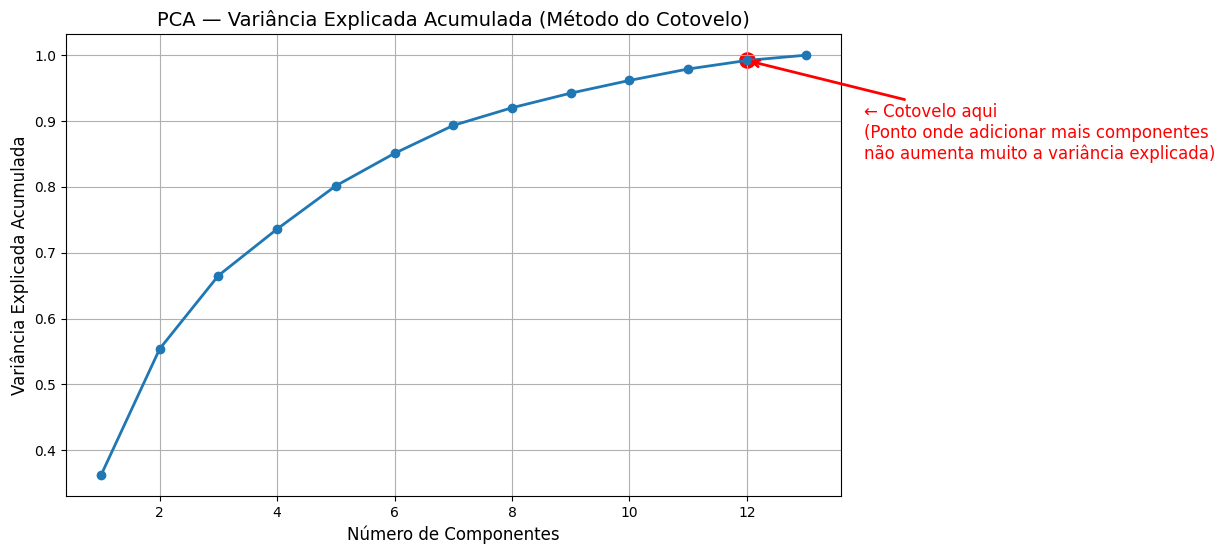

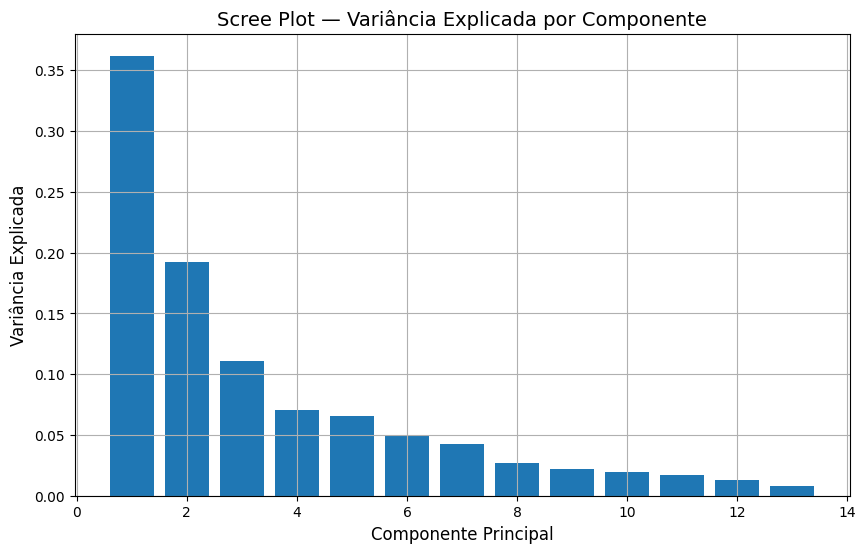

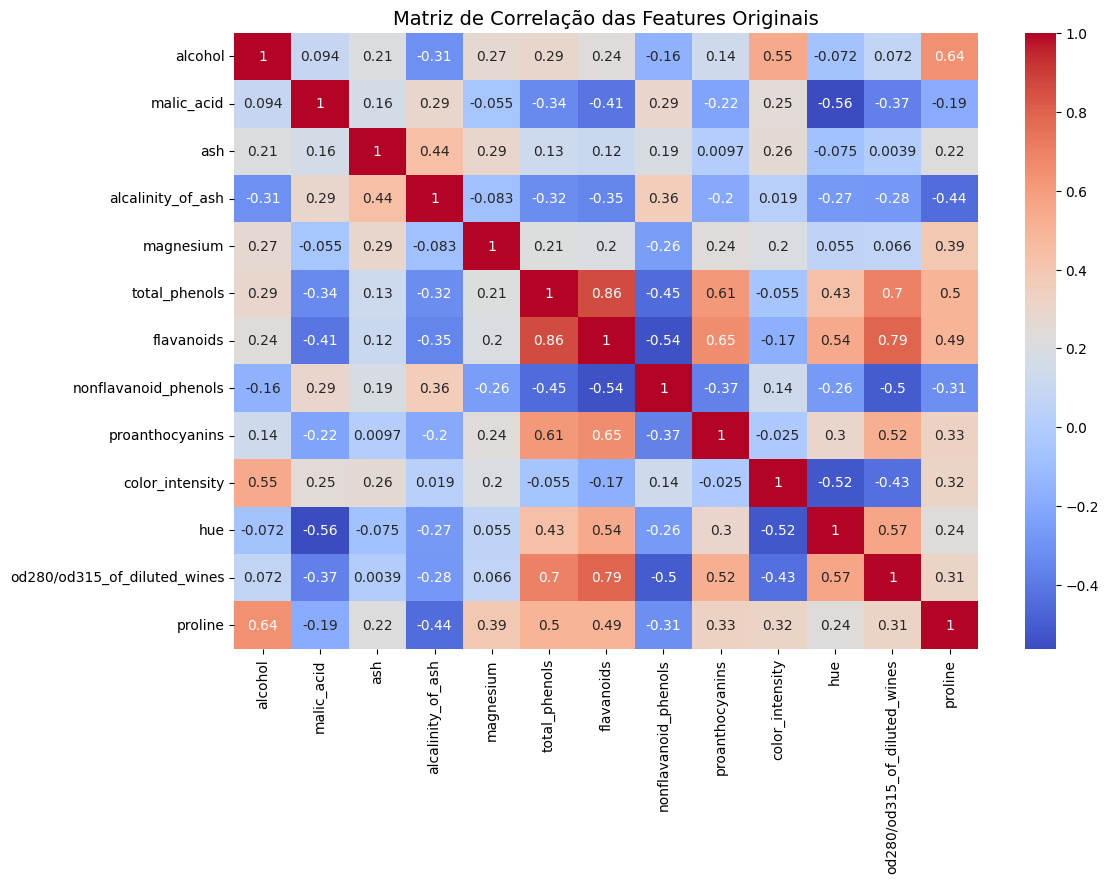

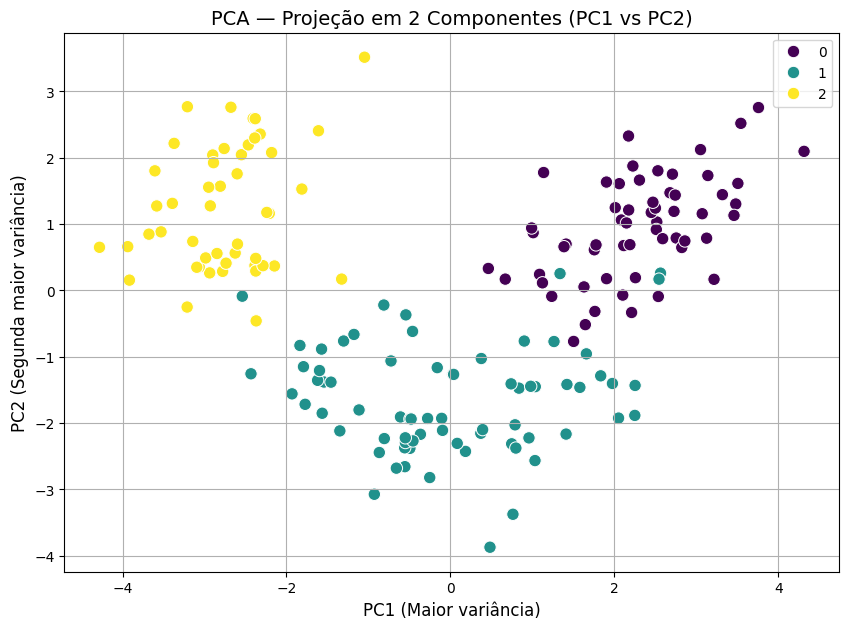

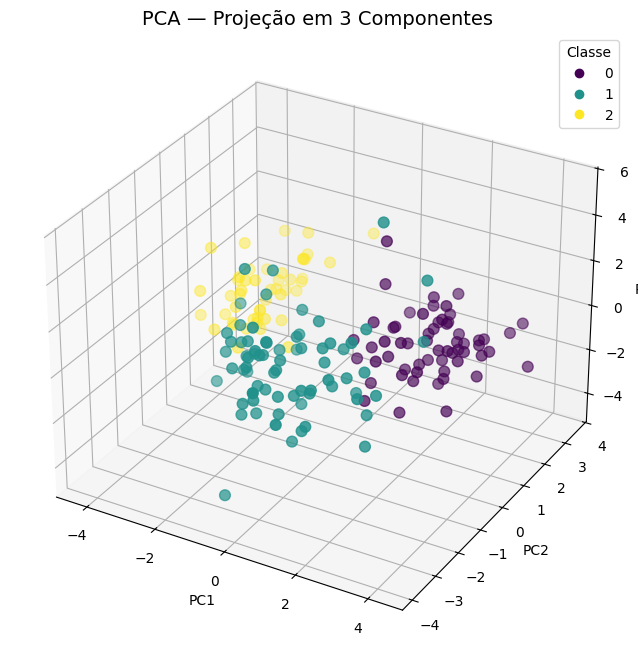

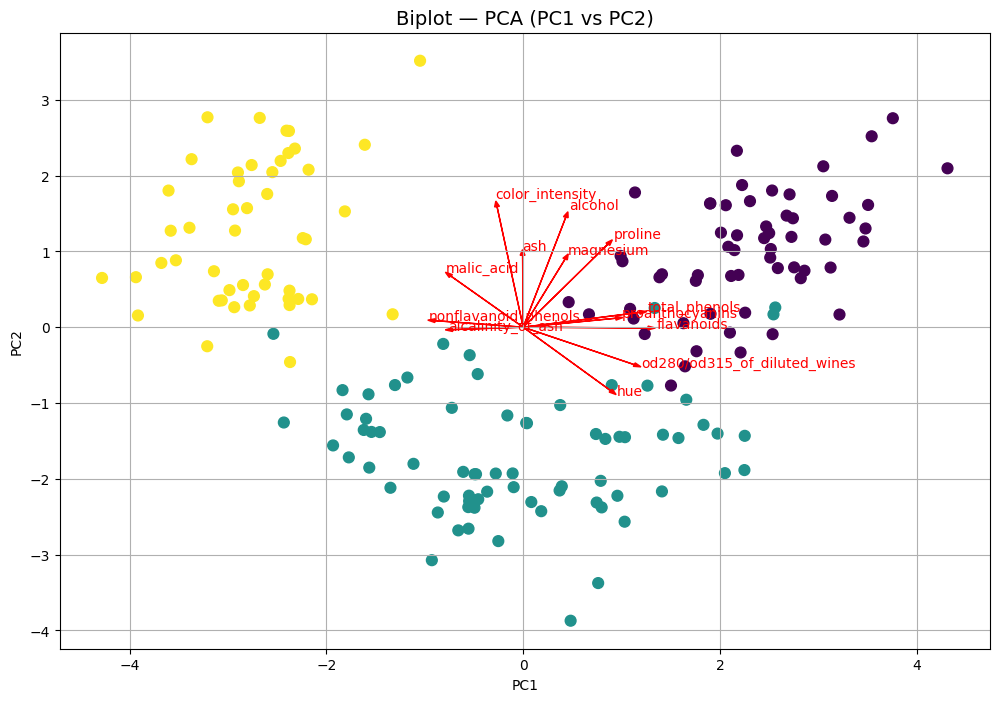

<Figure size 1200x600 with 0 Axes>

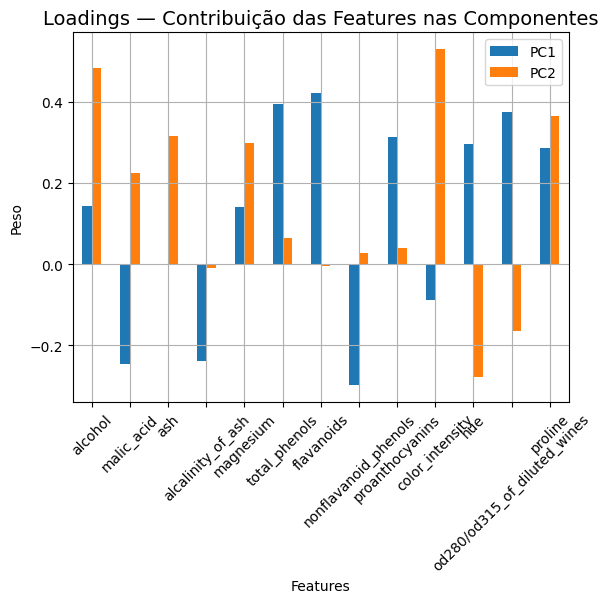

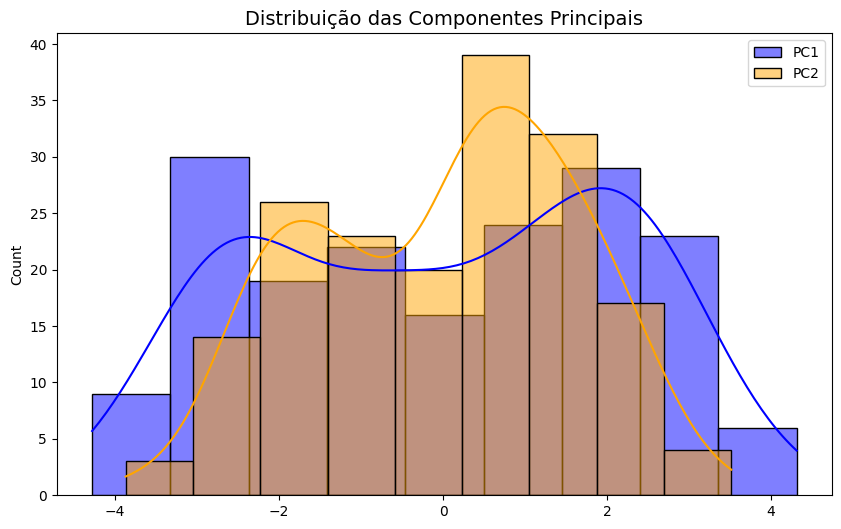

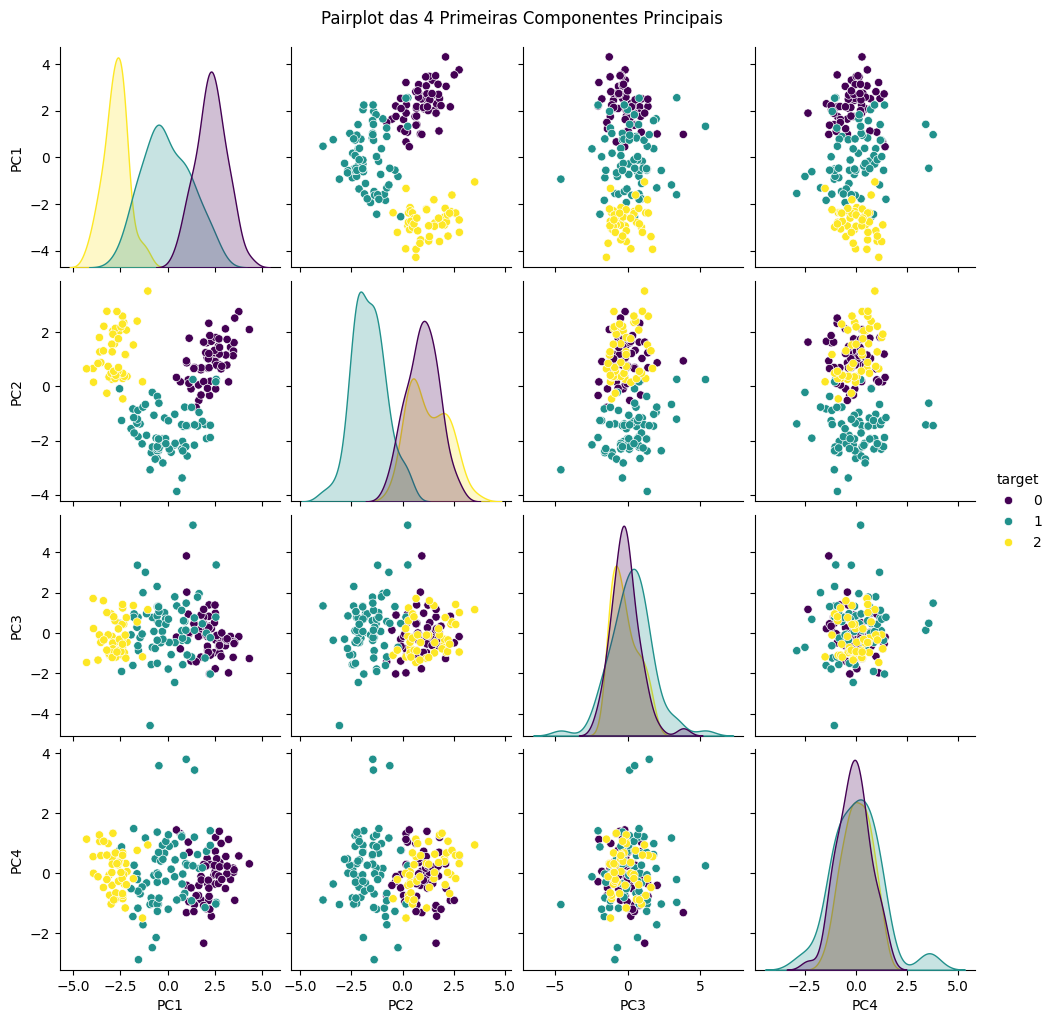

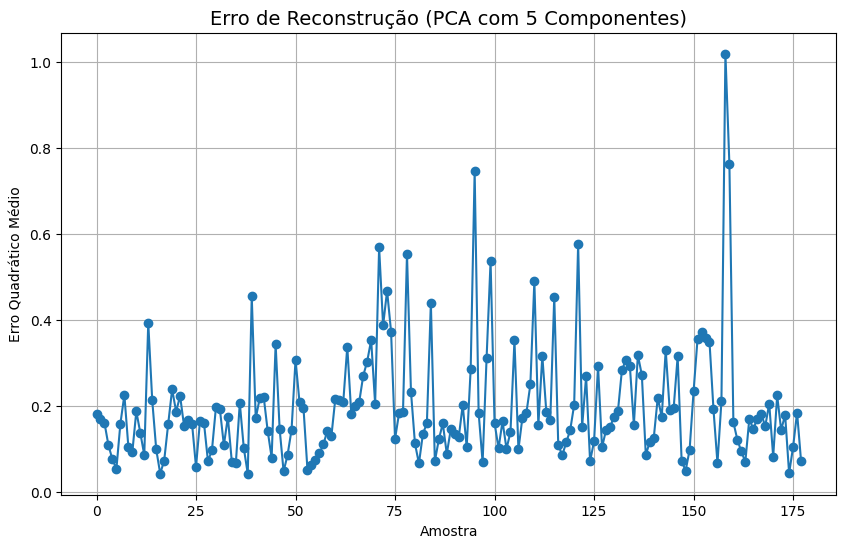

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ============================================================
# 1. Carregar dataset real (Wine)
# ============================================================
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# ============================================================
# 2. Padronizar os dados (PCA exige padronização)
# ============================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================
# 3. PCA completo (todas as componentes)
# ============================================================
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)
explained = np.cumsum(pca_full.explained_variance_ratio_)

# ============================================================
# 4. Encontrar automaticamente o "cotovelo"
# ============================================================
diffs = np.diff(explained)
elbow_idx = np.argmin(diffs) + 1  # +1 porque diff reduz o tamanho

# ============================================================
# 5. Gráfico do cotovelo com seta e anotação
# ============================================================
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained)+1), explained, marker='o', linewidth=2)
plt.title("PCA — Variância Explicada Acumulada (Método do Cotovelo)", fontsize=14)
plt.xlabel("Número de Componentes", fontsize=12)
plt.ylabel("Variância Explicada Acumulada", fontsize=12)
plt.grid(True)

# Seta apontando para o cotovelo
plt.annotate(
    "← Cotovelo aqui\n(Ponto onde adicionar mais componentes\nnão aumenta muito a variância explicada)",
    xy=(elbow_idx, explained[elbow_idx-1]),
    xytext=(elbow_idx+2, explained[elbow_idx-1] - 0.15),
    arrowprops=dict(arrowstyle="->", lw=2, color="red"),
    fontsize=12,
    color="red"
)

# Destacar o ponto do cotovelo
plt.scatter(elbow_idx, explained[elbow_idx-1], color="red", s=120)

plt.show()

# ============================================================
# 6. Scree Plot — variância individual por componente
# ============================================================
plt.figure(figsize=(10,6))
plt.bar(range(1, len(pca_full.explained_variance_ratio_)+1),
        pca_full.explained_variance_ratio_)
plt.title("Scree Plot — Variância Explicada por Componente", fontsize=14)
plt.xlabel("Componente Principal", fontsize=12)
plt.ylabel("Variância Explicada", fontsize=12)
plt.grid(True)
plt.show()

# ============================================================
# 7. Heatmap da matriz de correlação original
# ============================================================
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X, columns=feature_names).corr(),
            annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação das Features Originais", fontsize=14)
plt.show()

# ============================================================
# 8. Scatter 2D — PC1 vs PC2
# ============================================================
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, palette="viridis", s=80)
plt.title("PCA — Projeção em 2 Componentes (PC1 vs PC2)", fontsize=14)
plt.xlabel("PC1 (Maior variância)", fontsize=12)
plt.ylabel("PC2 (Segunda maior variância)", fontsize=12)
plt.grid(True)
plt.show()

# ============================================================
# 9. Scatter 3D — PC1 vs PC2 vs PC3
# ============================================================
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=y, cmap="viridis", s=60)
ax.set_title("PCA — Projeção em 3 Componentes", fontsize=14)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Classe")
plt.show()

# ============================================================
# 10. Biplot — PC1 vs PC2 + vetores das features
# ============================================================
plt.figure(figsize=(12,8))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap="viridis", s=60)

for i, feature in enumerate(feature_names):
    plt.arrow(0, 0,
              pca2.components_[0, i]*3,
              pca2.components_[1, i]*3,
              color='red', head_width=0.05)
    plt.text(pca2.components_[0, i]*3.2,
             pca2.components_[1, i]*3.2,
             feature, color='red')

plt.title("Biplot — PCA (PC1 vs PC2)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# ============================================================
# 11. Loadings — contribuição das features nas PCs
# ============================================================
loadings = pd.DataFrame(pca2.components_.T,
                        columns=['PC1','PC2'],
                        index=feature_names)

plt.figure(figsize=(12,6))
loadings.plot(kind='bar')
plt.title("Loadings — Contribuição das Features nas Componentes", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Peso")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ============================================================
# 12. Distribuição das componentes principais
# ============================================================
plt.figure(figsize=(10,6))
sns.histplot(X_pca2[:,0], kde=True, color='blue', label='PC1')
sns.histplot(X_pca2[:,1], kde=True, color='orange', label='PC2')
plt.title("Distribuição das Componentes Principais", fontsize=14)
plt.legend()
plt.show()

# ============================================================
# 13. Pairplot das 4 primeiras PCs
# ============================================================
df_pca = pd.DataFrame(X_pca_full[:, :4], columns=['PC1','PC2','PC3','PC4'])
df_pca['target'] = y

sns.pairplot(df_pca, hue='target', palette='viridis')
plt.suptitle("Pairplot das 4 Primeiras Componentes Principais", y=1.02)
plt.show()

# ============================================================
# 14. Erro de reconstrução (qualidade da redução)
# ============================================================
pca_recon = PCA(n_components=5)
X_reduced = pca_recon.fit_transform(X_scaled)
X_reconstructed = pca_recon.inverse_transform(X_reduced)

reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

plt.figure(figsize=(10,6))
plt.plot(reconstruction_error, marker='o')
plt.title("Erro de Reconstrução (PCA com 5 Componentes)", fontsize=14)
plt.xlabel("Amostra")
plt.ylabel("Erro Quadrático Médio")
plt.grid(True)
plt.show()
